# Classification Model Metrics

*I hear and I forget. I see and I remember. I do and I understand.*

## Helpers

In [1]:
# Global variables
radius <- 1
cols <- c(rgb(1, 0, 0, .5), rgb(0, 0, 1, .5))

### Data Generation

In [2]:
# f.count : False category (ex. population with no disease, non criminals)
# t.count : True category (ex. population with disease, criminals)
# fp.pct : Percent of false positives
# fn.pct : Percent of false negatives
get.data <- function(false.count = 100, true.count = 10, fp.pct = .1, fn.pct = .1, radius = 1){
    theta.1 <- seq(0, 2 * pi - .05, length = false.count)
    theta.2 <- seq(0, 2 * pi - .05, length = true.count)

    data <- data.frame(
      x = c(radius * cos(theta.1), radius / 2 * cos(theta.2)),
      y = c(radius * sin(theta.1), radius / 2 * sin(theta.2)),
      cat.real = c(rep(F, false.count), rep(T, true.count))
    )
    # Add predicted category with errors
    data$cat.pred <- data$cat.real

    false.noise <- fp.pct * false.count # False Positives (FP)
    true.noise <- fn.pct * true.count # False Negatives (FN)
    data$cat.pred[sample(1:false.count, false.noise)] = T
    data$cat.pred[sample((false.count + 1):(false.count + true.count), true.noise)] = F
    
    return(data)
}

### Metrics Computation

In [3]:
get.metrics <- function(data){
    m <- nrow(data)
    # Confusion matrix
    conf <- table(data$cat.real, data$cat.pred)
    conf.rate <- prop.table(conf)
    
    tp <- conf[2, 2]
    tn <- conf[1, 1]
    fp <- conf[1, 2]
    fn <- conf[2, 1]

    conf.metrics <- data.frame(
        name = c("true positive", "true negative", "false positive", "false negative"),
        value = c(tp, tn, fp, fn)
    )
    
    accuracy <- round((tp + tn) / m, digits = 2)
    precision <- round(tp / (tp + fp), digits = 2)
    recall <- round(tp / (tp + fn), digits = 2)
    specificity <- round(tn / (fp + tn), digits = 2)
    f1.score <- round((2 * tp) / (2 * tp + fp + fn), digits = 2)

    metrics <- data.frame(
        name = c("accuracy", "precision", "recall", "specificity", "f1-score"),
        value = c(accuracy, precision, recall, specificity, f1.score),
        desc = c(
            "Correct predictions rate",
            "Positive predictive value",
            "True positive rate",
            "True negative rate",
            "Harmonic mean of the precision and the recall"
        )
    )
    
    return(
        list(
            cm = list(
                conf = conf,
                conf.rate = conf.rate,
                tp = tp,
                tn = tn,
                fp = fp,
                fn = fn,
                as.text = conf.metrics
            ),
            accuracy = accuracy,
            precision = precision,
            recall = recall,
            specificity = specificity,
            f1.score = f1.score,
            as.text = metrics,
            m = m
        )
    )
}

### Dataviz

In [4]:
plot.internal <- function(x, y, cat, title){
        plot(
        x,
        y,
        xlim = c(-radius, radius),
        ylim = c(-radius, radius),
        col = cols[as.integer(cat) + 1],
        pch = 20,
        xlab = "x",
        ylab = "y",
        cex = 1,
        cex.axis = .8,
        cex.lab = .8,
        main = title
    )
    
    legend(
      "topleft",
      levels(factor(cat)),
      col = cols,
      pch = 20,
      y.intersp = .8,
      box.lwd = 0
    )
}

plot.real <- function(data){
    plot.internal(data$x, data$y, data$cat.real, "Real")
}

plot.predicted <- function(data){
    plot.internal(data$x, data$y, data$cat.pred, "Predicted")
}

## Sample

In [5]:
data <- get.data(radius = radius)
metrics <- get.metrics(data)

### True categories

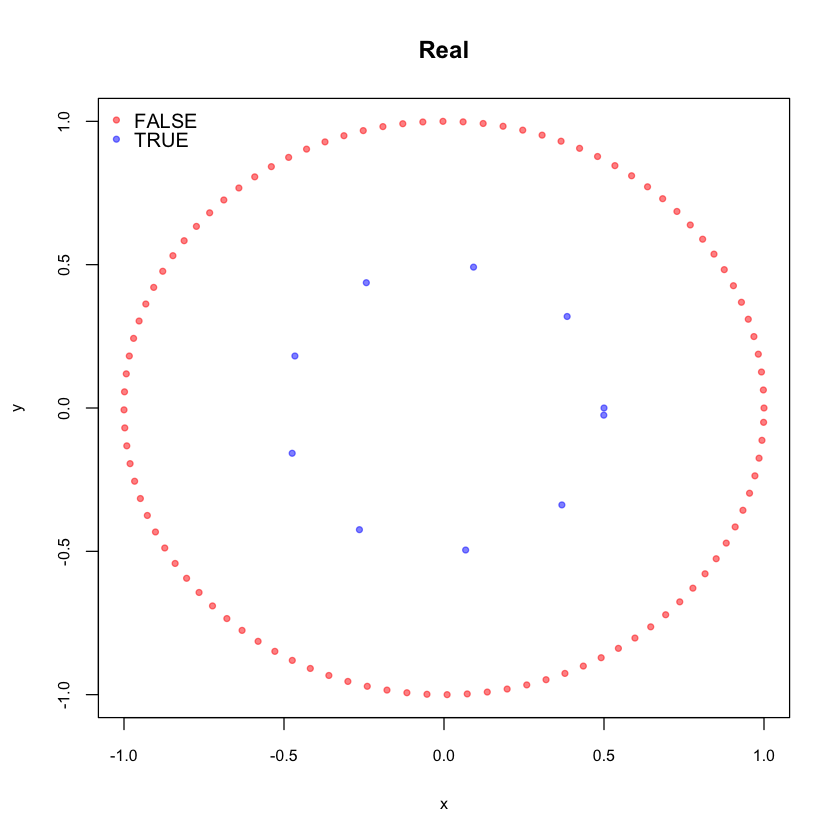

In [6]:
plot.real(data)

### Predicted categories

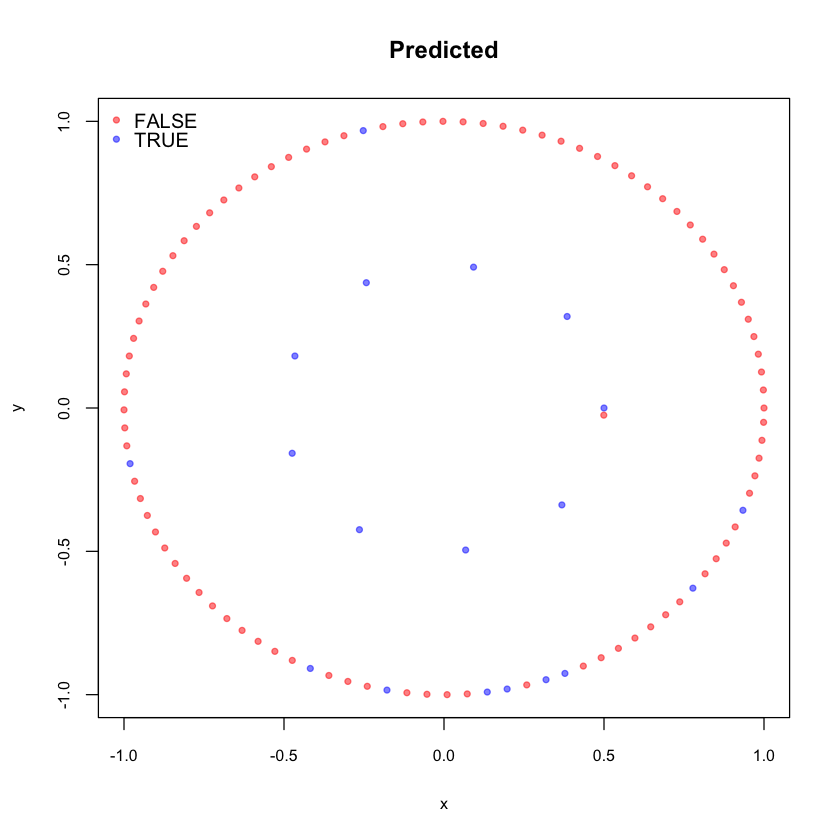

In [7]:
plot.predicted(data)

### Confusion Matrix

In [8]:
metrics$cm$conf
round(metrics$cm$conf.rate, digits = 2)

       
        FALSE TRUE
  FALSE    90   10
  TRUE      1    9

       
        FALSE TRUE
  FALSE  0.82 0.09
  TRUE   0.01 0.08

In [9]:
metrics$cm$as.text

,name,value
1,true positive,9
2,true negative,90
3,false positive,10
4,false negative,1


### Metrics

In [10]:
metrics$as.text

,name,value,desc
1,accuracy,0.9,Correct predictions rate
2,precision,0.47,Positive predictive value
3,recall,0.9,True positive rate
4,specificity,0.9,True negative rate
5,f1-score,0.62,Harmonic mean of the precision and the recall


## Base Rate Fallacy

In french: "oubli de la fréquence de base".

- Population : 1000
- Sick people : 50
- Healthy people : 950

In [11]:
population <- 1000
sick <- 50
healthy <- population - sick

### Case 1

Healthy people will be predicted as sick.

,name,value
1,true positive,45
2,true negative,95
3,false positive,855
4,false negative,5


,name,value,desc
1,accuracy,0.14,Correct predictions rate
2,precision,0.05,Positive predictive value
3,recall,0.9,True positive rate
4,specificity,0.1,True negative rate
5,f1-score,0.09,Harmonic mean of the precision and the recall


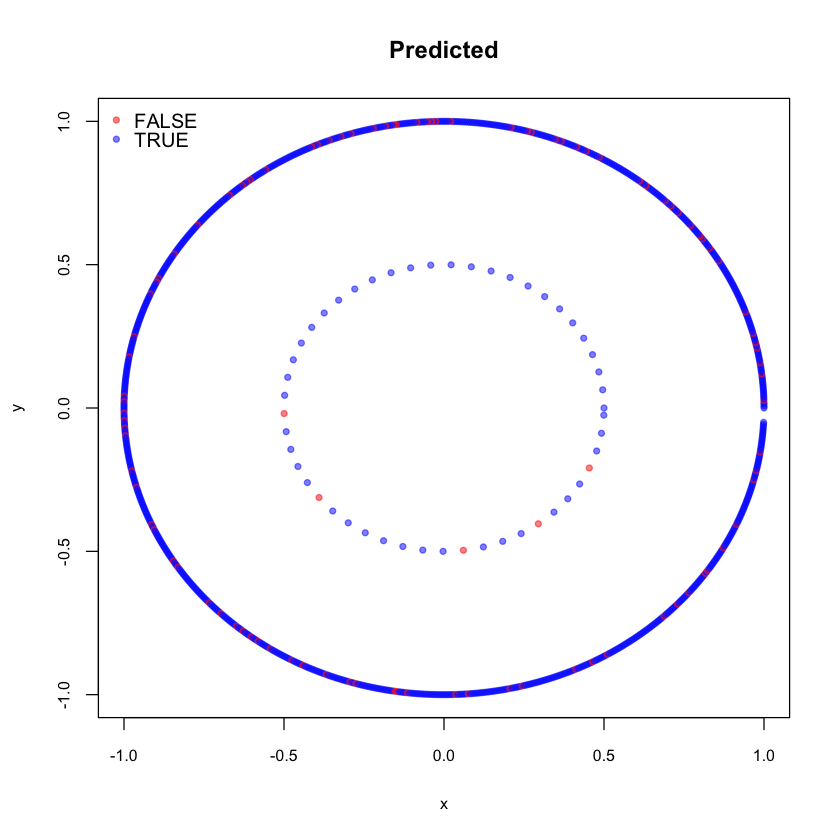

In [12]:
brf.data.1 <- get.data(false.count = healthy, true.count = sick, fp.pct = .9, fn.pct = .1)
brf.metrics.1 <- get.metrics(brf.data.1)

brf.metrics.1$cm$as.text
brf.metrics.1$as.text
plot.predicted(brf.data.1)

#### Interpretation

**accuracy** = 14%: we **do not** correctly detect when people are sick or healthy.

**recall** = 90%: we capture 90% of sick people (i.e. 45 out of 50 persons).

**precision** = 5%: we capture irrelevant results (false positive = 855 is high, those healthy persons will be considered as sick).

### Case 2

Sick people will be predicted as healthy.

,name,value
1,true positive,5
2,true negative,855
3,false positive,95
4,false negative,45


,name,value,desc
1,accuracy,0.86,Correct predictions rate
2,precision,0.05,Positive predictive value
3,recall,0.1,True positive rate
4,specificity,0.9,True negative rate
5,f1-score,0.07,Harmonic mean of the precision and the recall


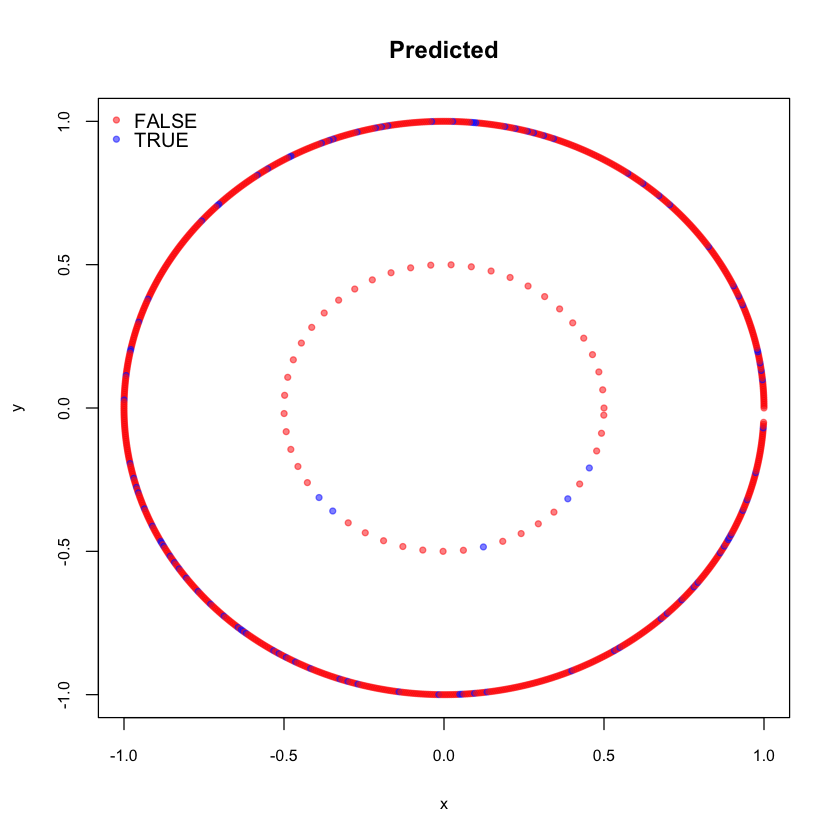

In [13]:
brf.data.2 <- get.data(false.count = healthy, true.count = sick, fp.pct = .1, fn.pct = .9)
brf.metrics.2 <- get.metrics(brf.data.2)

brf.metrics.2$cm$as.text
brf.metrics.2$as.text
plot.predicted(brf.data.2)

#### Interpretation

**accuracy** = 86%: we correctly detect when people are sick or healthy.

This sounds good, but...

**recall** = 10%: we only capture 10% of sick people (i.e. 5 out of 50 persons). 90% of sick persons **will not** be detected!